In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint
from random import randint

In [13]:
# Sample Sudoku puzzle (0 = empty)
sudoku_grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def create_sudoku_graph():
    G = nx.Graph()
    for row in range(9):
        for col in range(9):
            G.add_node((row, col))
            
    # Add edges for same row, column, or 3x3 block
    for i in range(9):
        for j in range(9):
            for k in range(9):
                if j != k:
                    G.add_edge((i, j), (i, k))  # Row
                    G.add_edge((j, i), (k, i))  # Column

    # Subgrid connections
    for br in range(0, 9, 3):
        for bc in range(0, 9, 3):
            block = [(br + i, bc + j) for i in range(3) for j in range(3)]
            for a in block:
                for b in block:
                    if a != b:
                        G.add_edge(a, b)
    return G

def visualize_sudoku_graph(G, assignment):
    pos = {(i, j): (j, -i) for i in range(9) for j in range(9)}
    labels = {(i, j): assignment.get((i, j), 0) for i in range(9) for j in range(9)}
    
    plt.figure(figsize=(9, 9))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=600, 
            node_color="lightblue", font_size=10)
    plt.title("Sudoku Graph Visualization")
    plt.axis("off")
    plt.show()


In [15]:
def get_initial_assignment(grid):
    assignment = {}
    for i in range(9):
        for j in range(9):
            if grid[i][j] != 0:
                assignment[(i, j)] = grid[i][j]
    return assignment

In [16]:
def is_valid(graph, node, value, assignment):
    for neighbor in graph.neighbors(node):
        if assignment.get(neighbor) == value:
            return False
    return True

def solve_sudoku(graph, assignment):
    if len(assignment) == 81:
        return assignment
    
    unassigned = [v for v in graph.nodes if v not in assignment]
    if not unassigned:
        return assignment

    node = unassigned[0]
    for value in range(1, 10):
        if is_valid(graph, node, value, assignment):
            assignment[node] = value
            result = solve_sudoku(graph, assignment)
            if result:
                return result
            del assignment[node]
    
    return None


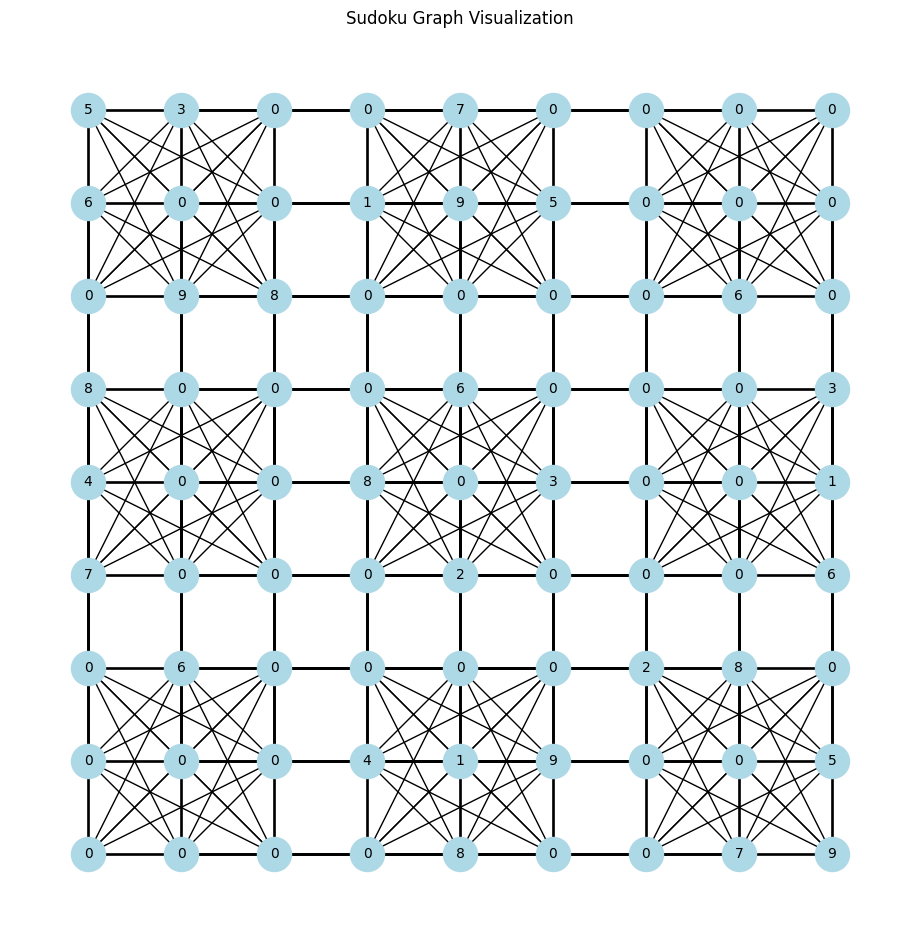

Solved Sudoku:


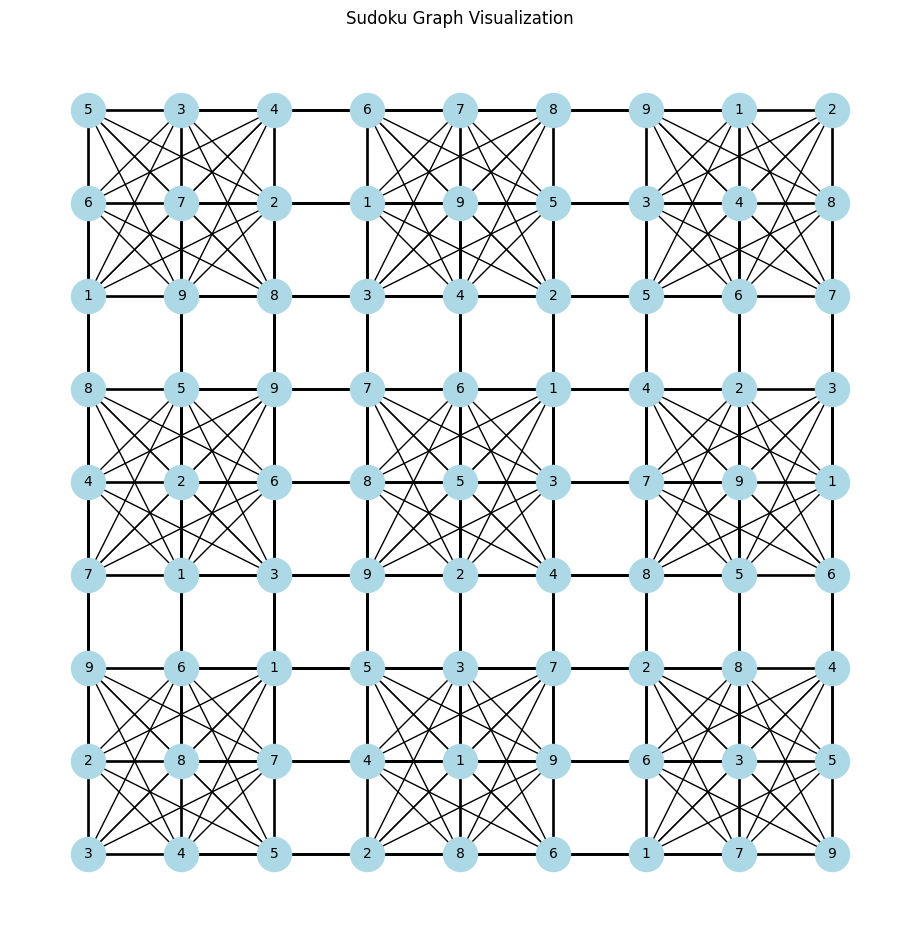

In [17]:
G = create_sudoku_graph()
initial_assignment = get_initial_assignment(sudoku_grid)

# Visualize initial state
visualize_sudoku_graph(G, initial_assignment)

# Solve
import copy
solution = solve_sudoku(G, copy.deepcopy(initial_assignment))

if solution:
    print("Solved Sudoku:")
    visualize_sudoku_graph(G, solution)
else:
    print("No solution found.")


In [18]:
import tkinter as tk
from tkinter import messagebox
import networkx as nx
import copy

# Create the Sudoku constraint graph
def create_sudoku_graph():
    G = nx.Graph()
    for row in range(9):
        for col in range(9):
            G.add_node((row, col))
    
    for i in range(9):
        for j in range(9):
            for k in range(9):
                if j != k:
                    G.add_edge((i, j), (i, k))
                    G.add_edge((j, i), (k, i))

    for br in range(0, 9, 3):
        for bc in range(0, 9, 3):
            block = [(br + i, bc + j) for i in range(3) for j in range(3)]
            for a in block:
                for b in block:
                    if a != b:
                        G.add_edge(a, b)
    return G

# Check if placing value is valid
def is_valid(graph, node, value, assignment):
    for neighbor in graph.neighbors(node):
        if assignment.get(neighbor) == value:
            return False
    return True

# Solve Sudoku via backtracking graph coloring
def solve_sudoku(graph, assignment):
    if len(assignment) == 81:
        return assignment
    
    unassigned = [v for v in graph.nodes if v not in assignment]
    if not unassigned:
        return assignment

    node = unassigned[0]
    for value in range(1, 10):
        if is_valid(graph, node, value, assignment):
            assignment[node] = value
            result = solve_sudoku(graph, assignment)
            if result:
                return result
            del assignment[node]
    return None

# GUI Application
class SudokuApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Sudoku Solver with Graph Theory")
        self.entries = [[None for _ in range(9)] for _ in range(9)]
        self.graph = create_sudoku_graph()
        self.build_grid()
        self.build_buttons()

    def build_grid(self):
        for i in range(9):
            for j in range(9):
                entry = tk.Entry(self.root, width=2, font=('Arial', 18), justify='center')
                entry.grid(row=i, column=j, padx=1, pady=1)
                self.entries[i][j] = entry

    def build_buttons(self):
        solve_btn = tk.Button(self.root, text="Solve", command=self.solve, bg='lightgreen', font=('Arial', 14))
        solve_btn.grid(row=9, column=0, columnspan=4, sticky='we')

        clear_btn = tk.Button(self.root, text="Clear", command=self.clear, bg='lightcoral', font=('Arial', 14))
        clear_btn.grid(row=9, column=5, columnspan=4, sticky='we')

    def get_grid(self):
        grid = []
        for i in range(9):
            row = []
            for j in range(9):
                val = self.entries[i][j].get()
                row.append(int(val) if val.isdigit() else 0)
            grid.append(row)
        return grid

    def set_grid(self, grid):
        for i in range(9):
            for j in range(9):
                self.entries[i][j].delete(0, tk.END)
                if grid[i][j] != 0:
                    self.entries[i][j].insert(0, str(grid[i][j]))

    def solve(self):
        grid = self.get_grid()
        assignment = {(i, j): grid[i][j] for i in range(9) for j in range(9) if grid[i][j] != 0}
        solution = solve_sudoku(self.graph, copy.deepcopy(assignment))

        if solution:
            result_grid = [[solution[(i, j)] for j in range(9)] for i in range(9)]
            self.set_grid(result_grid)
        else:
            messagebox.showerror("No solution", "This Sudoku cannot be solved.")

    def clear(self):
        for i in range(9):
            for j in range(9):
                self.entries[i][j].delete(0, tk.END)

# Run the GUI
if __name__ == "__main__":
    root = tk.Tk()
    app = SudokuApp(root)
    root.mainloop()
